# 事前準備

### ライブラリのインポート

In [1]:
import os

import pandas as pd
from matplotlib import pyplot as plt
import japanize_matplotlib

### 実行PATHの設定
- `sales_dashboard` ディレクトリから実行

In [26]:
# %cd {os.environ["PYTHONPATH"]}   # コメントアウトを外して実行

# データの読み込み

### 生データのダウンロード方法
- [../data/README.md](../data/README.md)を参照

### 生データファイルPATHを設定
- `sales_dashboard/data/stores_sales_forecasting/` 配下に格納した生データCSVファイル(`sales_data_sample.csv`)を利用する想定

### エンコードの設定
- 英語圏で作成されたファイルによく採用されている `ISO-8859-1` に設定

In [3]:
# 生データファイルPATH
RAW_DATA_FILE_PATH = f'{os.environ["PYTHONPATH"]}/data/stores_sales_forecasting.csv'

# 読み込み
df_raw = pd.read_csv(RAW_DATA_FILE_PATH, encoding='ISO-8859-1')

# 各カラムの情報を確認
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

<table border="1" align="left">
  <thead>
    <tr>
      <th>No.</th>
      <th>カラム名</th>
      <th>データ型</th>
      <th>説明</th>
    </tr>
  </thead>
  <tbody>
    <tr><td>1</td><td>Row ID</td><td>int64</td><td>レコードの一意な識別子（シリアル番号）</td></tr>
    <tr><td>2</td><td>Order ID</td><td>object</td><td>注文ごとの識別子。1つの注文に複数の製品が含まれることがある</td></tr>
    <tr><td>3</td><td>Order Date</td><td>object（文字列）</td><td>注文日（後で日付型に変換すべき）</td></tr>
    <tr><td>4</td><td>Ship Date</td><td>object（文字列）</td><td>商品が出荷された日（後で日付型に変換すべき）</td></tr>
    <tr><td>5</td><td>Ship Mode</td><td>object</td><td>出荷方法（例：Second Class、Standard Classなど）</td></tr>
    <tr><td>6</td><td>Customer ID</td><td>object</td><td>顧客の一意なID</td></tr>
    <tr><td>7</td><td>Customer Name</td><td>object</td><td>顧客のフルネーム</td></tr>
    <tr><td>8</td><td>Segment</td><td>object</td><td>顧客のセグメント（例：Consumer, Corporate, Home Office）</td></tr>
    <tr><td>9</td><td>Country</td><td>object</td><td>国名（このデータでは基本的にUSAのみ）</td></tr>
    <tr><td>10</td><td>City</td><td>object</td><td>市区町村名</td></tr>
    <tr><td>11</td><td>State</td><td>object</td><td>州名</td></tr>
    <tr><td>12</td><td>Postal Code</td><td>int64</td><td>郵便番号</td></tr>
    <tr><td>13</td><td>Region</td><td>object</td><td>地域区分（例：West, East, Central, South）</td></tr>
    <tr><td>14</td><td>Product ID</td><td>object</td><td>製品の一意なID</td></tr>
    <tr><td>15</td><td>Category</td><td>object</td><td>商品の大分類カテゴリ（例：Furniture, Office Supplies, Technology）</td></tr>
    <tr><td>16</td><td>Sub-Category</td><td>object</td><td>商品の小分類（例：Chairs, Binders, Phonesなど）</td></tr>
    <tr><td>17</td><td>Product Name</td><td>object</td><td>製品名（商品名）</td></tr>
    <tr><td>18</td><td>Sales</td><td>float64</td><td>販売金額（売上高）</td></tr>
    <tr><td>19</td><td>Quantity</td><td>int64</td><td>売れた数量</td></tr>
    <tr><td>20</td><td>Discount</td><td>float64</td><td>割引率（例：0.2は20%オフ）</td></tr>
    <tr><td>21</td><td>Profit</td><td>float64</td><td>利益額（＝売上 − 原価）</td></tr>
  </tbody>
</table>


### "Row ID": 'int64'
- レコードの一意な識別子（シリアル番号）

In [4]:
# 先頭の5サンプルを表示
display(df_raw["Row ID"].head())

# "Row ID"のユニーク数
unique_row_id_count = df_raw["Row ID"].nunique()

f'"Row ID"のユニーク数: {unique_row_id_count} / 全サンプル数: {len(df_raw)}'

0     1
1     2
2     4
3     6
4    11
Name: Row ID, dtype: int64

'"Row ID"のユニーク数: 2121 / 全サンプル数: 2121'

### "Order ID": str
- 注文ごとの識別子
- 1つの注文に複数の製品が含まれることがある

0    CA-2016-152156
1    CA-2016-152156
2    US-2015-108966
3    CA-2014-115812
4    CA-2014-115812
Name: Order ID, dtype: object

ユニークな"Order ID"の数: 1764
重複する"Order ID"の数: 357 (全サンプルの 16.8 %)
重複するユニークな"Order IDの数": 295 (全"Order ID"の 16.7 %)


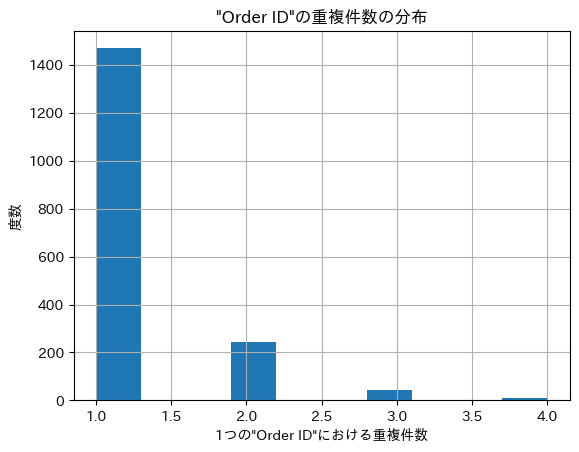

In [5]:
# 先頭の5サンプルを表示
display(df_raw["Order ID"].head())

# ユニークな"Order ID"の数
unique_order_id_count = df_raw["Order ID"].nunique()
print(f'ユニークな"Order ID"の数: {unique_order_id_count}')

# 重複する"Order ID"の数と割合
duplicated_order_id_count = df_raw["Order ID"].duplicated().sum()   # 数
duplicated_order_id_proportion = '{:.1f}'.format(duplicated_order_id_count / len(df_raw) * 100)   # 割合
print(f'重複する"Order ID"の数: {duplicated_order_id_count} (全サンプルの {duplicated_order_id_proportion} %)')

# 重複するユニークな"Order ID"の数と割合
duplicated_unique_order_id_count = (df_raw["Order ID"].value_counts() > 1).sum()   # 数
duplicated_unique_order_id_proportion = '{:.1f}'.format(duplicated_unique_order_id_count / unique_order_id_count * 100)   # 割合
print(f'重複するユニークな"Order IDの数": {duplicated_unique_order_id_count} (全"Order ID"の {duplicated_unique_order_id_proportion} %)')

# "Order ID"の重複件数の分布を可視化
df_raw["Order ID"].value_counts().hist()
plt.title('"Order ID"の重複件数の分布')
plt.xlabel('1つの"Order ID"における重複件数')
plt.ylabel('度数')
plt.show()

### 日付系カラム確認用の関数を定義
- データ期間や件数の推移の確認が目的

In [6]:
def check_monthly_rows_count(
    df_raw_: pd.DataFrame,   # 生データのDataFrame
    date_column_name: str,   # 日付カラム名
) -> None:
    '''
    1. 先頭の5サンプルを表示
    2. 元のままだと文字列の状態なのでdatetime型に変換・結果を確認
    3. 変換後の日付データを'yyyy-mm'フォーマットに加工・結果を確認
    4. 月次サンプル件数の推移を可視化
    '''
    print(f'日付系カラム "{date_column_name}" を確認')
    print()

    # 1. 先頭の5サンプルを表示
    print('先頭の5サンプルを表示')
    display(df_raw_[date_column_name].head())
    print()

    # 2. 元のままだと文字列の状態なのでdatetime型に変換・結果を確認
    df_date = df_raw_[[date_column_name]].copy()   # 変換用のDataFrameを作成
    ymd_column_name = date_column_name.replace(' Date', '_ymd').lower()   # 変換後のカラム名を定義
    df_date[ymd_column_name] = pd.to_datetime(df_date[date_column_name])   # 変換
    print(f'▼datetime型に変換:\n"{date_column_name}"(変換前) / "{ymd_column_name}"(変換後)')
    display(df_date.head())
    print()

    # 'yyyy-mm'フォーマットに加工・結果を確認
    year_month_column_name = ymd_column_name.replace('_ymd', '_year_month')   # 加工後のカラム名を定義
    df_date[year_month_column_name] = df_date[ymd_column_name].dt.strftime('%Y-%m')   # 'yyyy-mm'フォーマットに加工
    print("▼'yyyy-mm'フォーマットに加工:")
    display(df_date[[ymd_column_name, year_month_column_name]].head())
    
    # 月次サンプル件数の推移を可視化
    year_month_count_series =\
        df_date.groupby([year_month_column_name])[ymd_column_name].count()   # 月次サンプル数を集計
    year_month_count_series.plot.bar(   # 可視化
        title=f'月次サンプル件数の推移({date_column_name})',
        xlabel=f'年-月({date_column_name})',
        ylabel='件数',
        figsize=(15, 2),
        grid=True,
    )
    plt.show()
    print('\n'*2)

### "Order Date": str
- 注文日

### "Ship Date": str
- 商品が出荷された日

日付系カラム "Order Date" を確認

先頭の5サンプルを表示


0     11/8/2016
1     11/8/2016
2    10/11/2015
3      6/9/2014
4      6/9/2014
Name: Order Date, dtype: object


▼datetime型に変換:
"Order Date"(変換前) / "order_ymd"(変換後)


,Order Date,order_ymd
0,11/8/2016,2016-11-08
1,11/8/2016,2016-11-08
2,10/11/2015,2015-10-11
3,6/9/2014,2014-06-09
4,6/9/2014,2014-06-09



▼'yyyy-mm'フォーマットに加工:


,order_ymd,order_year_month
0,2016-11-08,2016-11
1,2016-11-08,2016-11
2,2015-10-11,2015-10
3,2014-06-09,2014-06
4,2014-06-09,2014-06


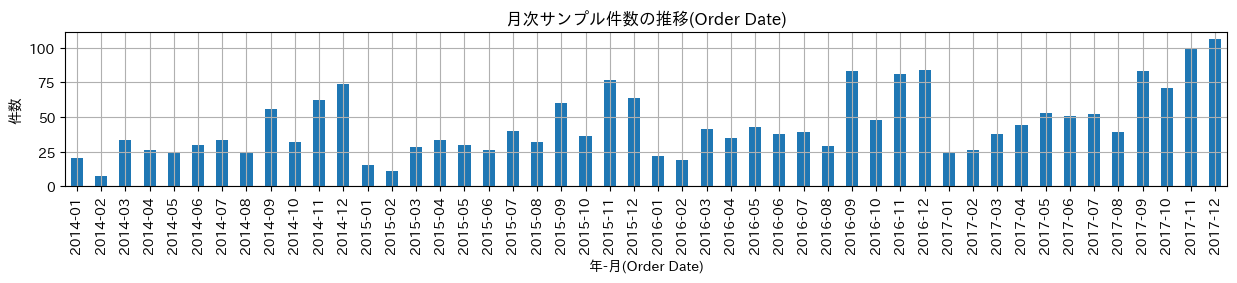




日付系カラム "Ship Date" を確認

先頭の5サンプルを表示


0    11/11/2016
1    11/11/2016
2    10/18/2015
3     6/14/2014
4     6/14/2014
Name: Ship Date, dtype: object


▼datetime型に変換:
"Ship Date"(変換前) / "ship_ymd"(変換後)


,Ship Date,ship_ymd
0,11/11/2016,2016-11-11
1,11/11/2016,2016-11-11
2,10/18/2015,2015-10-18
3,6/14/2014,2014-06-14
4,6/14/2014,2014-06-14



▼'yyyy-mm'フォーマットに加工:


,ship_ymd,ship_year_month
0,2016-11-11,2016-11
1,2016-11-11,2016-11
2,2015-10-18,2015-10
3,2014-06-14,2014-06
4,2014-06-14,2014-06


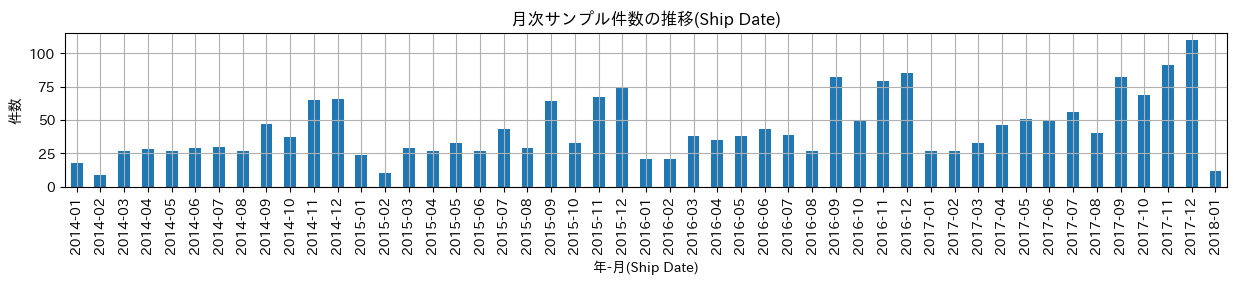

In [7]:
for date_column_name in ["Order Date", "Ship Date"]:
    check_monthly_rows_count(df_raw, date_column_name)

### "Customer ID": str
- 顧客の一意なID

0    CG-12520
1    CG-12520
2    SO-20335
3    BH-11710
4    BH-11710
Name: Customer ID, dtype: object


ユニークな"Customer ID"の数: 707
重複する"Customer ID"の数: 1414 (全サンプルの 66.7 %)
重複するユニークな"Customer IDの数": 547 (全"Customer ID"の 77.4 %)


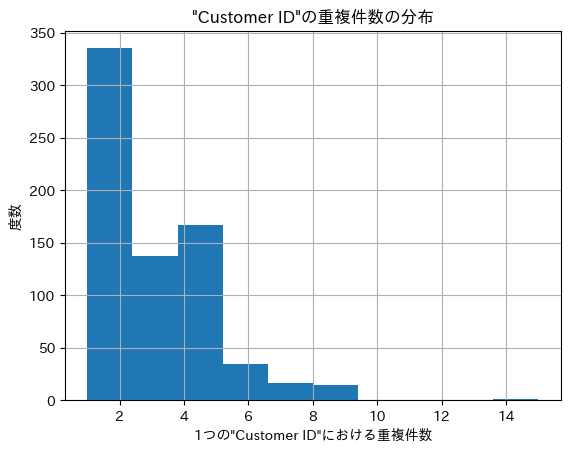

In [8]:
# 先頭の5件を表示
display(df_raw["Customer ID"].head())
print()

# ユニークな"Customer ID"の数
unique_customer_id_count = df_raw["Customer ID"].nunique()
print(f'ユニークな"Customer ID"の数: {unique_customer_id_count}')

# 重複する"Customer ID"の数と割合
duplicated_customer_id_count = df_raw["Customer ID"].duplicated().sum()   # 数
duplicated_customer_id_proportion = '{:.1f}'.format(duplicated_customer_id_count / len(df_raw) * 100)   # 割合
print(f'重複する"Customer ID"の数: {duplicated_customer_id_count} (全サンプルの {duplicated_customer_id_proportion} %)')

# 重複するユニークな"Customer ID"の数と割合
duplicated_unique_customer_id_count = (df_raw["Customer ID"].value_counts() > 1).sum()   # 数
duplicated_unique_customer_id_proportion = '{:.1f}'.format(duplicated_unique_customer_id_count / unique_customer_id_count * 100)   # 割合
print(f'重複するユニークな"Customer IDの数": {duplicated_unique_customer_id_count} (全"Customer ID"の {duplicated_unique_customer_id_proportion} %)')

# "Customer ID"の重複件数の分布を可視化
df_raw["Customer ID"].value_counts().hist()
plt.title('"Customer ID"の重複件数の分布')
plt.xlabel('1つの"Customer ID"における重複件数')
plt.ylabel('度数')
plt.show()

### "Customer Name": str
- 顧客のフルネーム

In [9]:
# 先頭の5件を表示
display(df_raw["Customer Name"].head())
print()

# ユニークな"Customer Name"の数
unique_customer_name_count = df_raw["Customer Name"].nunique()
print(f'ユニークな"Customer Name"の数: {unique_customer_name_count}')

# "Customer ID"と一意であるかどうかを確認
df_customers = df_raw[["Customer ID", "Customer Name"]].drop_duplicates().copy()
print(f'ユニークな"Customer ID"と"Customer Name"のペア数: {len(df_customers)}')

0        Claire Gute
1        Claire Gute
2     Sean O'Donnell
3    Brosina Hoffman
4    Brosina Hoffman
Name: Customer Name, dtype: object


ユニークな"Customer Name"の数: 707
ユニークな"Customer ID"と"Customer Name"のペア数: 707


### カテゴリ系カラムの集計用に関数を定義
- 各カテゴリの件数と全体に占める割合を円グラフでプロット

In [10]:
def plot_percent_and_count(
    df_raw_: pd.DataFrame,   # 生データのDataFrame
    category_column_name: str,   # カテゴリカラム名
) -> None:
    '''
    1. 先頭の5サンプルを表示
    2. 各カテゴリの件数と全体に占める割合を円グラフでプロット
    '''
    # 先頭の5件を表示
    display(df_raw[category_column_name].head())
    print()

    # 各カテゴリの割合・件数を可視化
    count_series = df_raw[category_column_name].value_counts()   # カテゴリ毎の件数を集計
    plt.pie(
        count_series,
        labels=count_series.index,
        autopct=lambda percent:
            _autopct_format(percent, count_series),
        startangle=90,
    )
    plt.axis('equal')
    plt.ylabel('')  # 不要なy軸ラベルを消す
    plt.title(f'"{category_column_name}"別の割合(%)と件数')
    plt.show()

def _autopct_format(
    percent: 'float64',   # 割合の値 (%)
    count_series: pd.Series,   # 各カテゴリ毎の件数
) -> str:
    '''
    円グラフに割合と件数を同時表示するカスタムフォーマット関数
    '''
    count = int(round(percent / 100. * sum(count_series)))
    return f"{percent:.1f}%\n({count}件)"  # 割合と件数の両方を表示

### "Ship Mode": str
- 出荷方法

0      Second Class
1      Second Class
2    Standard Class
3    Standard Class
4    Standard Class
Name: Ship Mode, dtype: object

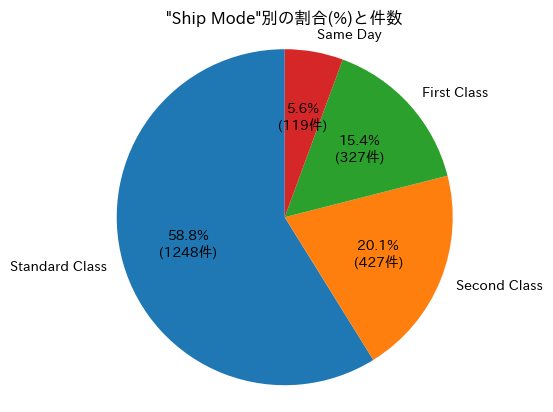

In [11]:
plot_percent_and_count(
    df_raw,
    category_column_name="Ship Mode",
)

### "Segment": str
- 顧客のセグメント

0    Consumer
1    Consumer
2    Consumer
3    Consumer
4    Consumer
Name: Segment, dtype: object

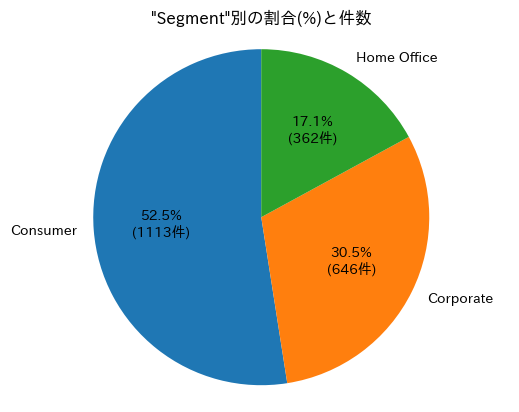

In [12]:
plot_percent_and_count(
    df_raw,
    category_column_name="Segment",
)

### "Country": str
- 国名

0    United States
1    United States
2    United States
3    United States
4    United States
Name: Country, dtype: object

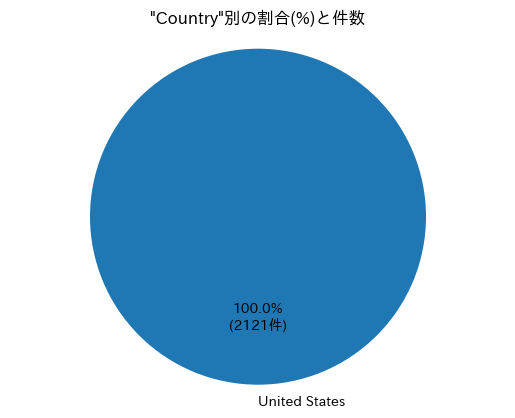

In [13]:
plot_percent_and_count(
    df_raw,
    category_column_name="Country",
)

### "City": str
- 市区町村名

0          Henderson
1          Henderson
2    Fort Lauderdale
3        Los Angeles
4        Los Angeles
Name: City, dtype: object

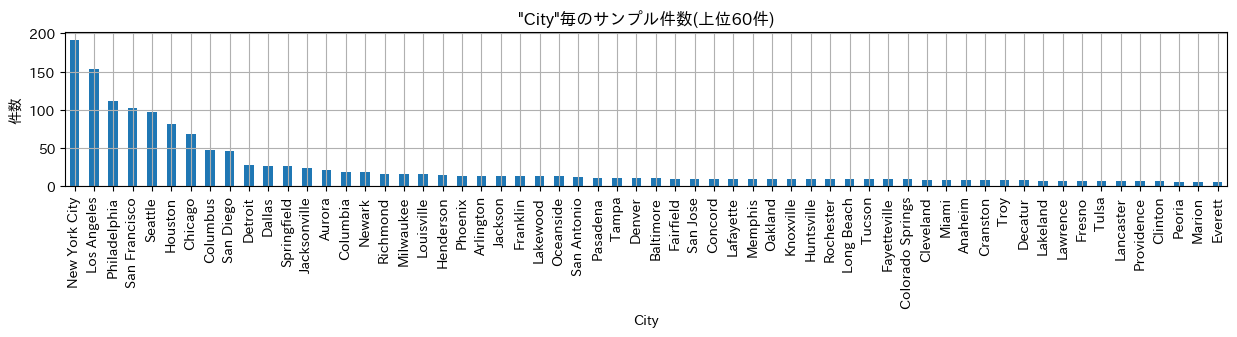

In [14]:
# 先頭のデータを5件表示
display(df_raw["City"].head())
print()

# "City"毎のサンプル件数(上位60件)を可視化
df_raw["City"].value_counts().head(60).plot.bar(
    title='"City"毎のサンプル件数(上位60件)',
    ylabel='件数',
    figsize=(15, 2),
    grid=True,
)
plt.show()

### "State": str
- 州名

0      Kentucky
1      Kentucky
2       Florida
3    California
4    California
Name: State, dtype: object

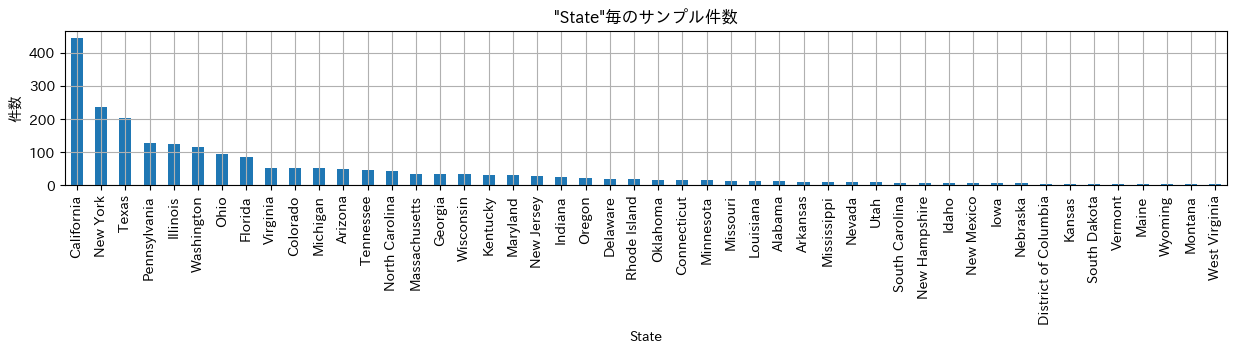

In [15]:
# 先頭のデータを5件表示
display(df_raw["State"].head())
print()

# "State"毎のサンプル件数を可視化
df_raw["State"].value_counts().plot.bar(
    title='"State"毎のサンプル件数',
    ylabel='件数',
    figsize=(15, 2),
    grid=True,
)
plt.show()

### "Postal Code": 'int64'
- 郵便番号

0    42420
1    42420
2    33311
3    90032
4    90032
Name: Postal Code, dtype: int64

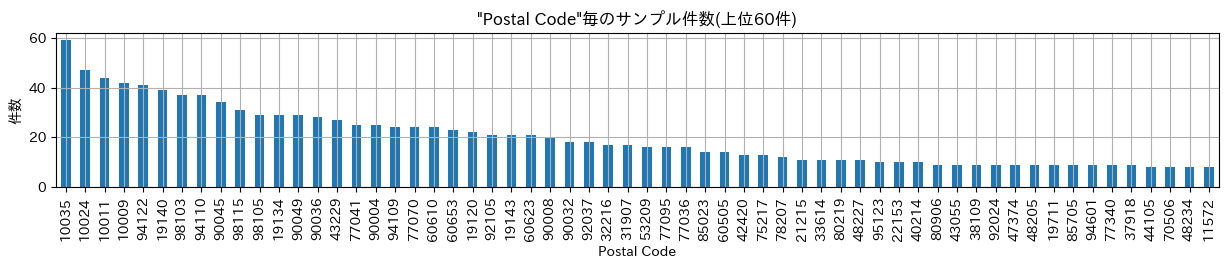

In [16]:
# 先頭のデータを5件表示
display(df_raw["Postal Code"].head())
print()

# "Postal Code"毎のサンプル件数(上位60件)を可視化
df_raw["Postal Code"].value_counts().head(60).plot.bar(
    title='"Postal Code"毎のサンプル件数(上位60件)',
    ylabel='件数',
    figsize=(15, 2),
    grid=True,
)
plt.show()

### "Region": str
- 地域区分

0    South
1    South
2    South
3     West
4     West
Name: Region, dtype: object

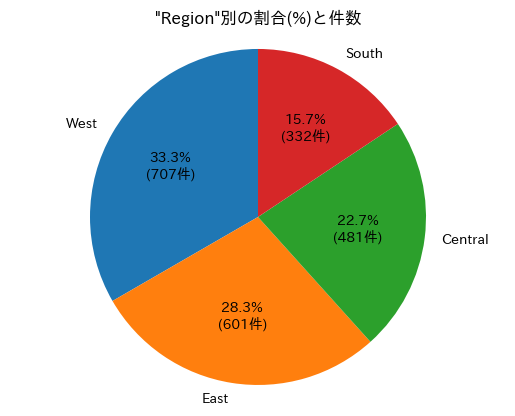

In [17]:
plot_percent_and_count(
    df_raw,
    category_column_name="Region",
)

### "Category": str
- 商品の大分類カテゴリ

0    Furniture
1    Furniture
2    Furniture
3    Furniture
4    Furniture
Name: Category, dtype: object

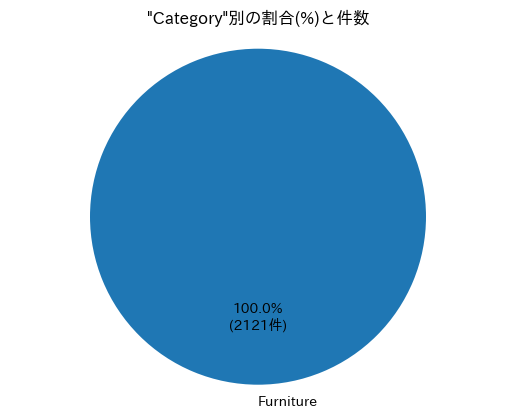

In [18]:
plot_percent_and_count(
    df_raw,
    category_column_name="Category",
)

### "Sub-Category": str
- 商品の小分類カテゴリ

0      Bookcases
1         Chairs
2         Tables
3    Furnishings
4         Tables
Name: Sub-Category, dtype: object

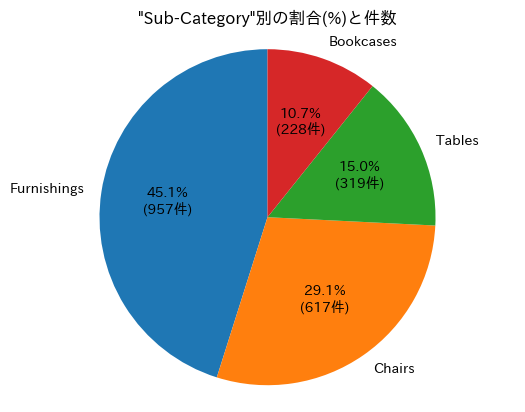

In [19]:
plot_percent_and_count(
    df_raw,
    category_column_name="Sub-Category",
)

### "Product ID": str
- 製品の一意なID

In [20]:
# 先頭の5サンプルを表示
display(df_raw["Product ID"].head())

# ユニークな"Product ID"の数
unique_product_id_count = df_raw["Product ID"].nunique()
print(f'ユニークな"Product ID"の数: {unique_product_id_count}')

0    FUR-BO-10001798
1    FUR-CH-10000454
2    FUR-TA-10000577
3    FUR-FU-10001487
4    FUR-TA-10001539
Name: Product ID, dtype: object

ユニークな"Product ID"の数: 375


### "Product Name": str
- 製品(商品)名

In [21]:
# 先頭の5サンプルを表示
display(df_raw["Product Name"].head())

# ユニークな"Product Name"の数
unique_product_name_count = df_raw["Product Name"].nunique()
print(f'ユニークな"Product Name"の数: {unique_product_name_count}')

# "Product ID"と一意であるかどうかを確認
df_products = df_raw[["Product ID", "Product Name"]].drop_duplicates().copy()
df_products = df_products
print(f'ユニークな"Product ID"と"Product Name"のペア数: {len(df_products)} (≠ ユニークな"Product Name"の数)')

# 複数の"Product ID"に紐づく"Product Name"を確認
df_product_id_count = df_products.groupby(["Product Name"]).count()   # 各"Product Name"に紐づく"Product ID"の件数をカウント
df_product_id_count = df_product_id_count.rename(columns={"Product ID": "id_count"})   # 改名
df_products.merge(
    df_product_id_count.query("id_count > 1"),   # 複数の"Product ID"が紐づく商品に絞り込み
    how='inner',
    on=["Product Name"],
)[["Product Name", "Product ID"]].sort_values("Product Name")   # "Product Name"で並べ替え

0                    Bush Somerset Collection Bookcase
1    Hon Deluxe Fabric Upholstered Stacking Chairs,...
2        Bretford CR4500 Series Slim Rectangular Table
3    Eldon Expressions Wood and Plastic Desk Access...
4             Chromcraft Rectangular Conference Tables
Name: Product Name, dtype: object

ユニークな"Product Name"の数: 380
ユニークな"Product ID"と"Product Name"のペア数: 383 (≠ ユニークな"Product Name"の数)


,Product Name,Product ID
1,Eldon Wave Desk Accessories,FUR-FU-10000023
5,Eldon Wave Desk Accessories,FUR-FU-10003981
3,KI Adjustable-Height Table,FUR-TA-10004086
4,KI Adjustable-Height Table,FUR-TA-10001039
0,Staple-based wall hangings,FUR-FU-10004351
2,Staple-based wall hangings,FUR-FU-10001940


### "Sales": 'float64'
- 販売金額(売上高)

0     261.9600
1     731.9400
2     957.5775
3      48.8600
4    1706.1840
Name: Sales, dtype: float64

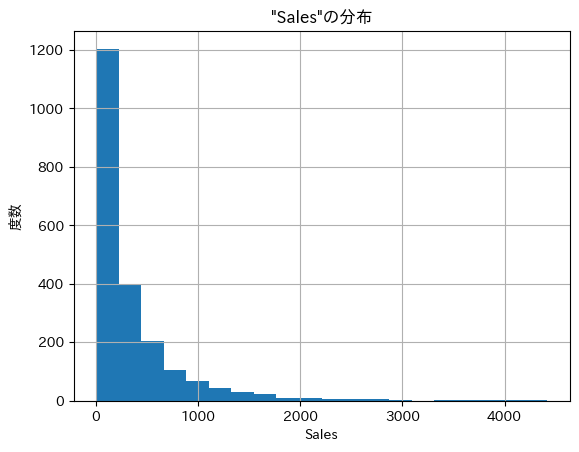

In [22]:
# 先頭の5サンプルを表示
display(df_raw["Sales"].head())

# "Sales"の分布
df_raw["Sales"].hist(bins=20)
plt.title('"Sales"の分布')
plt.xlabel('Sales')
plt.ylabel('度数')
plt.show()

### "Quantity": 'int64'
- 売れた数量

0    2
1    3
2    5
3    7
4    9
Name: Quantity, dtype: int64

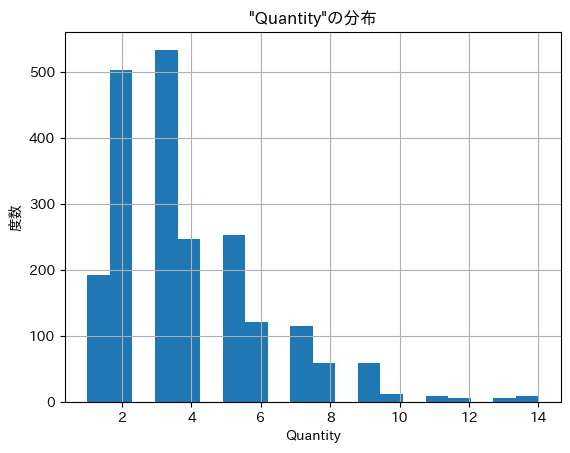

In [23]:
# 先頭の5サンプルを表示
display(df_raw["Quantity"].head())

# "Quantity"の分布
df_raw["Quantity"].hist(bins=20)
plt.title('"Quantity"の分布')
plt.xlabel('Quantity')
plt.ylabel('度数')
plt.show()

### "Discount": 'float64'
- 割引率(例: 0.2は20%OFF)

0    0.00
1    0.00
2    0.45
3    0.00
4    0.20
Name: Discount, dtype: float64

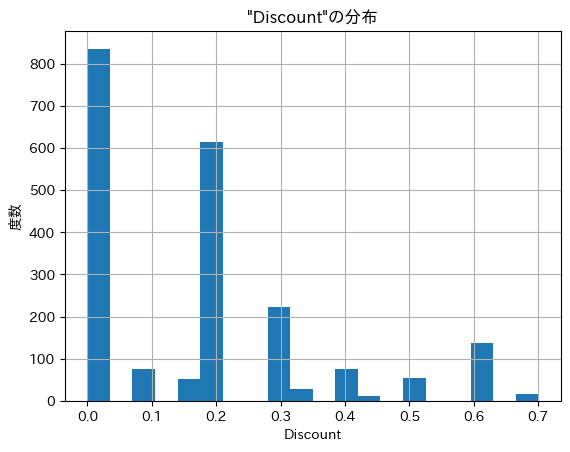

In [24]:
# 先頭の5サンプルを表示
display(df_raw["Discount"].head())

# "Discount"の分布
df_raw["Discount"].hist(bins=20)
plt.title('"Discount"の分布')
plt.xlabel('Discount')
plt.ylabel('度数')
plt.show()

### "Profit": 'float64'
- 利益額(=売上－原価)

0     41.9136
1    219.5820
2   -383.0310
3     14.1694
4     85.3092
Name: Profit, dtype: float64

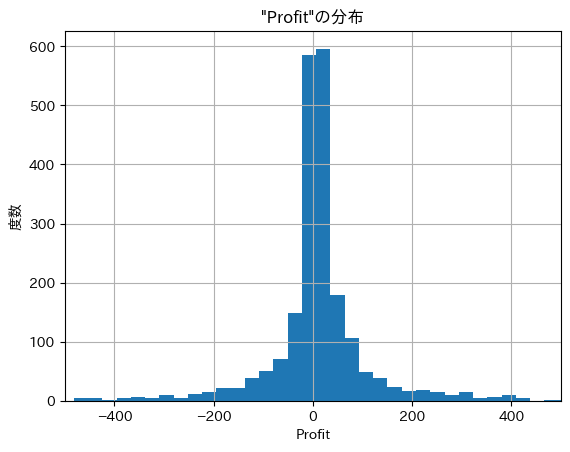

In [25]:
# 先頭の5サンプルを表示
display(df_raw["Profit"].head())

# "Profit"の分布
df_raw["Profit"].hist(bins=100)
plt.xlim(-500, 500)
plt.title('"Profit"の分布')
plt.xlabel('Profit')
plt.ylabel('度数')
plt.show()